## KNN Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
sn.set(style='whitegrid')

In [2]:
housing = pd.read_csv('housing.data.txt',  header=None, sep='\s+')
housing.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
                   'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
                   'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

### Visualize the data using scatter plot

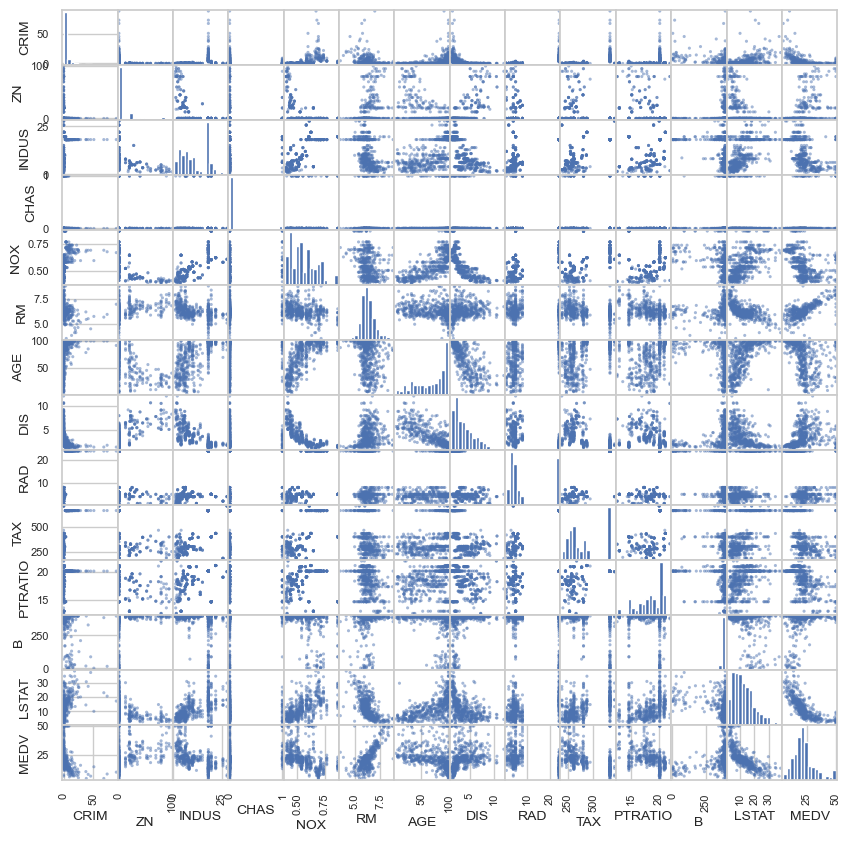

In [3]:
scatter = pd.plotting.scatter_matrix(housing, marker = '.', s=20, hist_kwds={'bins':15}, figsize=(10,10))
#y labels
temp1=[plt.setp(item.yaxis.get_label(), 'size', 10) for item in scatter.ravel()]
#x labels
temp2=[plt.setp(item.xaxis.get_label(), 'size', 10) for item in scatter.ravel()]

### Split the data into a Training Set and a Testing/Test  Set

In [4]:
X = housing.iloc[:,:-1]
Y = housing.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Use a KNN Regression Model to predict house prices

In [6]:
scaler=MinMaxScaler()
#normalize the features
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
# build a KNN regressor
knn = KNeighborsRegressor(n_neighbors = 3)
# train the KNN regressor
knn.fit(X_train_s, Y_train)
# test the KNN regressor
Y_test_pred = knn.predict(X_test_s)
# Calculate errors
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

MSE= 35.123126361655764
MAE= 3.701633986928104
MAPE= 0.16744002331643457
